<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout2_PartA_MarginalDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #2 Part A: Variation in Marginal Distribution


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 2.1

Consider the following data that has been collected from students in my introductory statistics course over several past semesters.  

<table>
  <tr>
    <td width='30%' valign='top'>
      <ul>
        <li><strong>Response Variable</strong>: Hair Length (mm)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Gender</li>
          <li>Height (inches)</li>
         </ul>
    </ul>
    </td>
    <td width='70%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1h4lXsxXMRHVRtdg48vdbMbGahWfGz_oS" width='50%' height='50%'></img></p>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1W1F3yLFTI-AOUOg10Gnl7zsetSX-6lXz" width='50%' height='50%'></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse package is a common R package used for the management of data. The tidyverse() package is loaded into this COLAB session here.

In [ ]:
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [ ]:
# Reading data in using read.csv via Base 
HairLength <- read.csv("http://www.StatsClass.org/stat360/Datasets/HairLength.csv", stringsAsFactors = TRUE)

The **head()** function can be used to see the first few lines of the dataset.  Similarly, the tail() function can be used to see the last few lines of a dataset.

In [ ]:
# View the first few rows of data
head(HairLength)

,RowID,Gender,Name,Height,Length
,<int>,<fct>,<fct>,<int>,<int>
1,1,F,Kelsie,66,359
2,2,M,Eric,73,50
3,3,F,Susan,66,295
4,4,F,Alesha,72,320
5,5,F,Alexa,70,470
6,6,F,Jackie,62,180


## Marginal Distribution

A univariate analysis of the response marginalizes (or ignores) the effect of all other variables that may be under study.  In this situation, it is said that the marginal distribution of the response is being considered.


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1LPzWbsWEWnveFHxLiwlCVu07HK7Kw8W0" width='35%' height='35%'></img></p>

A summary of marginal distribution *ignores* all other variables and considers the response variable in isolation.

In [ ]:
# Summary of the response variable
( HairLength
  %>% select(Length)
  %>% summary()
)

     Length     
 Min.   : 12.0  
 1st Qu.: 60.0  
 Median :248.0  
 Mean   :237.3  
 3rd Qu.:380.0  
 Max.   :578.0  

An alternative summarization that includes measures of variation.

In [ ]:
#Getting individual summary statistics
(HairLength 
  %>% summarize(
                  Mean = mean(Length),
                  'Standard Devation' = sd(Length),
                  Variance = var(Length),
                  Count = n(),
               )
)

Mean,Standard Devation,Variance,Count
<dbl>,<dbl>,<dbl>,<int>
237.2595,171.7999,29515.19,131


Next, consider a visual summary of the response variable - Hair Length.

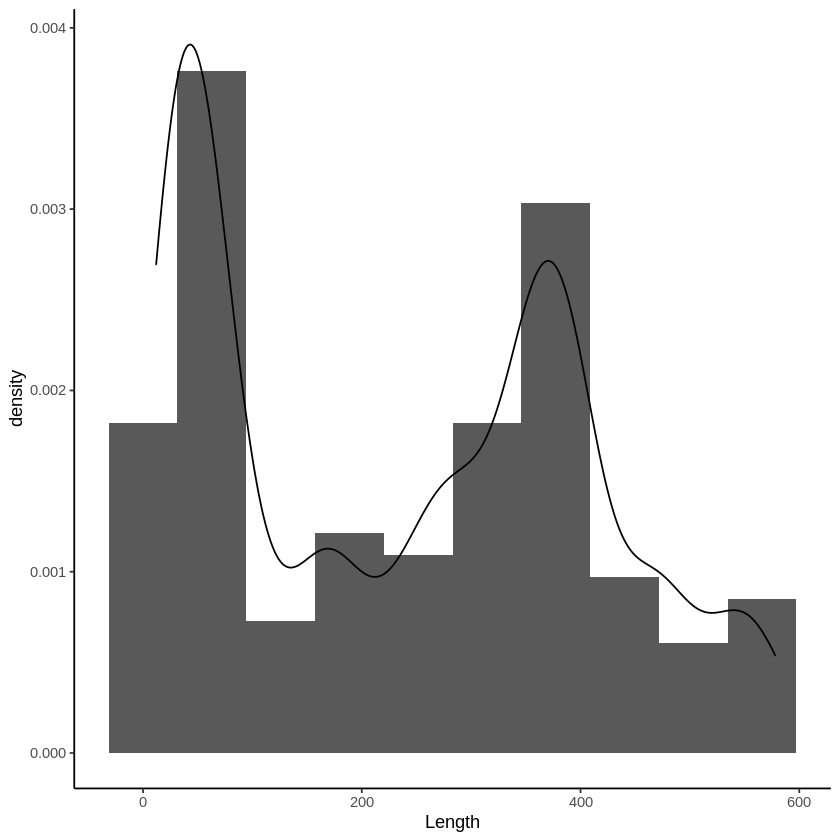

In [ ]:
# Plotting the Empirical Density Function
ggplot(data=HairLength, aes(x=Length)) + 
  geom_histogram(aes(y=..density..), bins=10) + 
  geom_density(adjust=0.5) +
  theme_classic()

Historically, the **mean** and **variance** have been considered to be sufficient in describing a distribution.  [In fact, the mean and variance are said to be sufficient statistics for a wide class of distributions.] Certainly, information is lost when all data values are reduced to a single quantity that is supposedly  describing a typical value (i.e. mean or average) and a single quantity being used to quantify the variation (i.e. standard deviation or variance).

In this class, we will use the E() or expectation notation to denote the mean and Var() to denote the variance.  The following notion will be used to describe the mean and variance of the response Hair Length.



*   $\mbox{Mean} = E(Hair \space Length)$
*   $\mbox{Variance} = Var(Hair \space Length)$



When these quantities are *estimated* from the data, the commonly used “hat” notation will be used.




*   Estimate of the mean from the data
$$\hat{E}(Hair \space Length) = 237.3$$

*   Estimate of the variance from the data
$$\begin{array}{rcl}
\hat{Var}(Hair \space Length) & = & [\space \hat{Std}(Hair \space Length) \space]^2 \\
& = & [ \space 171.7999 \space]^2 \\
& = & 29515.19 \\
\end{array}
$$

## Explained vs. Unexplained Variation

Consider the following Wiki entry for “Explained” Variation.



<table>
<tr>
  <td align="center" valign="top">
<img src="https://drive.google.com/uc?export=view&id=1w1MscaHKpkJWD5CaaykuReAGIbMycXHq" width='75%' height='75%'></img><br>
Source:  <a href="https://en.wikipedia.org/wiki/Explained_variation">https://en.wikipedia.org/wiki/Explained_variation</a>
</td>
</tr>
</table>

Consider next the concept of explained vs unexplained variation in the context of our example.  There are several reasons why people have different hair lengths (e.g. specific hair styles, days since last haircut, gender, etc.).  If such variables are known to have an effect on hair length, then some of the inherent variation in hair length can be explained. However, if the aforementioned variables have no effect on hair length or if the aforementioned variables are ignored all together, then all the variation in hair length is said to be unexplained.


*   **Explained Variation**: Variation in a response that can be attributed to one or more other variables
*   **Unexplained Variation**: Variation in a response that remains after considering other variables



**Comment**:  When *only* the marginal distribution of a response is being considered, then all the variation in the response is said to be unexplained.


## Measuring the Unexplained Variation

Recall, the *unexplained* variation is the inherent variation that exists in hair lengths.  Up to this point, we have only considered the marginal distribution of hair length (i.e. we have ignored other variables such as gender, hair style, etc.), thus all the variation in hair length is said to be unexplained. 

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1AT1rY6PXjviRT_Fh0snHOiwo5K7NIKQw"></img></p>

The variance of the response is used to quantify the amount of unexplained variation.  

$$Variance = \frac{\sum{(Residual)^2}}{n-1}$$

where

$$Residual = (Data \space Point - Mean)$$

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions



1.   What does it mean if the residual value is positive?  Negative?

2.   What does it mean if the residual is small (i.e. close to zero)?

3.   Suppose the residual value for the particular data point is positive.  Is the mean an *over-estimate* or an *under-estimate* for this particular data value?  Explain.



<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

The residual value for the $1^{st}$ observation in the Hair Length dataset.  

In [ ]:
# Getting the 1st residual value
( HairLength
  %>% mutate(`Mean Length` = mean(Length))
  %>% mutate('Residual' = (Length - `Mean Length`) )
  %>% select(RowID, Length, `Mean Length`, Residual)
  %>% filter(RowID == 1)
)

RowID,Length,Mean Length,Residual
<int>,<int>,<dbl>,<dbl>
1,359,237.2595,121.7405


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1AeyPdEVBcKsj70K8YGe8UPhGBZMfjfKN" width="50%" height="50%"></img></p>

Next, consider the residual values for the 1st three observataions.

In [ ]:
# Getting residual value for 1st three observations
( HairLength
  %>% mutate(`Mean Length` = mean(Length))
  %>% mutate('Residual' = (Length - `Mean Length`) )
  %>% select(RowID, Length, `Mean Length`, Residual)
  %>% filter(RowID < 4)
) -> HairLength_Subset

HairLength_Subset$Color <- c("RED","GREEN","BLUE")

HairLength_Subset

RowID,Length,Mean Length,Residual,Color
<int>,<int>,<dbl>,<dbl>,<chr>
1,359,237.3,121.7,RED
2,50,237.3,-187.3,GREEN
3,295,237.3,57.7,BLUE


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1RZLk1yt5C4KCdRCJPWq6M9_gyRyMDJaR" width="25%" height="25%"></img></p>


All residual values are shown on the graphic below.  

<p align='center'><img src="https://drive.google.com/uc?export=view&id=13KQHcp2tGUiiUIfVWZQ74nS69p66y2Ic" width="25%" height="25%"></img></p>

### Putting the Residuals into a Spreadsheet

The following code snipit can be used to write a *.csv file.  The Residuals.csv file is placed into the /content/sample_data/ folder.

In [ ]:
# Getting the residual values for all observations
( HairLength
  %>% mutate(`Mean Length` = mean(Length))
  %>% mutate('Residual' = (Length - `Mean Length`) )
  %>% select(RowID, Length, `Mean Length`, Residual)
) -> Residuals

#Save the Residuals data.frame into a *.csv file that can be downloaded
write.csv(Residuals, '/content/sample_data/Residuals.csv', row.names=FALSE)
list.files('/content/sample_data/')

[1] "anscombe.json"                "california_housing_test.csv" 
[3] "california_housing_train.csv" "mnist_test.csv"              
[5] "mnist_train_small.csv"        "README.md"                   
[7] "Residuals.csv"

The residual value from each observation can be viewed via the print() command.

In [ ]:
print(Residuals)

    RowID Length Mean Length    Residual
1       1    359    237.2595  121.740458
2       2     50    237.2595 -187.259542
3       3    295    237.2595   57.740458
4       4    320    237.2595   82.740458
5       5    470    237.2595  232.740458
6       6    180    237.2595  -57.259542
7       7     36    237.2595 -201.259542
8       8    248    237.2595   10.740458
9       9     70    237.2595 -167.259542
10     10    180    237.2595  -57.259542
11     11    270    237.2595   32.740458
12     12     48    237.2595 -189.259542
13     13     64    237.2595 -173.259542
14     14    260    237.2595   22.740458
15     15    400    237.2595  162.740458
16     16    165    237.2595  -72.259542
17     17    285    237.2595   47.740458
18     18    160    237.2595  -77.259542
19     19     33    237.2595 -204.259542
20     20     18    237.2595 -219.259542
21     21    385    237.2595  147.740458
22     22    535    237.2595  297.740458
23     23     19    237.2595 -218.259542
24     24    389

Here, the IRdisplay() package will be used to display the Residual data.frame in a Google Speadsheet.

In [ ]:
# download the IRdisplay() package
install.packages("IRdisplay")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# load the IRdisplay package into the current COLAB session
library(IRdisplay)

In [ ]:
#@title Display Residual data.frame as spreadsheet
display_html("<iframe width='650px' height='400px' src='https://docs.google.com/spreadsheets/d/e/2PACX-1vS7hhTOvLOLVvs5NnpEBU9_3QkKr16l_i26p5hUN5EGl1bDPb5lW-C2m7KzOnB1nufqB9uHAmwUPi04/pubhtml?gid=667044368&amp;single=true&amp;widget=true&amp;headers=false'>
</iframe>")

Source: https://docs.google.com/spreadsheets/d/10PqgI-qWAzLwuljNepBUBTelgDRs2AkpcjUc1Sks0aE/copy?usp=sharing

## Dealing with the Cancelling out Effect

Notice, that when all the residual values are added up the total is 0.  This happens whenever the average is used to estimate the mean function.  Visually, we can see this happens because all the positive residuals cancel out all the negative residuals. 


**Task**: Show that $\sum Residuals = 0$.

$$\begin{array}{rcl}
 \sum Residuals & = & \sum(Data \space Point - Mean) \\
 & = & \sum Data \space Point - \sum Mean \\
 & = & \sum Data \space Point - n * Mean \\
 & = & \sum Data \space Point - n * \frac{\sum Data \space Point}{n} \\ 
 & = & \sum Data \space Point - \sum Data \space Point \\ 
 & = & 0
\end{array}
$$

There are two **mathematical** ways to avoid the cancelling out effect when summing the residuals.




*   **Total (Squared) Variation** = $\sum{(Residual)^2}$
*   **Total (Absolute) Variation** = $\sum{|Residual|}$



## Computing Total Variation in the Marginal Distribution

The first method -- squaring the residuals -- is more generally known as squared error loss or L2 loss. The absolute or L1 loss function is the name given when an absolute value is used to get rid of the negatives. 


Consider the following Wiki entry for "Loss Function".

<table>
<tr>
  <td align="center" valign="top">
<img src="https://drive.google.com/uc?export=view&id=1hZmktO2M3kPNeJWY-90P19vbBef87FVK" width='75%' height='75%'></img><br>
Source:  <a href="https://en.wikipedia.org/wiki/Loss_function">https://en.wikipedia.org/wiki/Loss_function</a>
</td>
</tr>
</table>


**Comments**:

1.   Whenever an L2 loss function is used, the *mean* is the qauntity that will minimize the residuals across all observations.

2.   If an L1 loss function is being used, then the *median* is the quantity that will minimize the residuals across all observations.

In [ ]:
#@title Display Sum of |Residual|
display_html("<iframe width='800px' height='400px' src='https://docs.google.com/spreadsheets/d/e/2PACX-1vS7hhTOvLOLVvs5NnpEBU9_3QkKr16l_i26p5hUN5EGl1bDPb5lW-C2m7KzOnB1nufqB9uHAmwUPi04/pubhtml?gid=1495890913&amp;single=true&amp;widget=true&amp;headers=false'>
</iframe>")

Total variation when using absolute loss function.

$$\begin{array}{rcl}
\mbox{Total Variation with L1 Loss} & = & \sum{|Residual|} \\
& = & 20106.2 \\
\end{array}
$$

In [ ]:
#@title Display Sum of Residual^2
display_html("<iframe width='800px' height='400px' src='https://docs.google.com/spreadsheets/d/e/2PACX-1vS7hhTOvLOLVvs5NnpEBU9_3QkKr16l_i26p5hUN5EGl1bDPb5lW-C2m7KzOnB1nufqB9uHAmwUPi04/pubhtml?gid=934511772&amp;single=true&amp;widget=true&amp;headers=false'>
</iframe>")

Total variation when using squared loss function.

$$\begin{array}{rcl}
\mbox{Total Variation with L2 Loss} & = & \sum{(Residual)^2} \\
& = & 3836975.2 \\
\end{array}
$$

**Comments**: 

1.  The total amount of variation (when using L2 Loss) is SAME as the numerator of the variance.

$$\begin{array}{rcl}
\mbox{Total Variation} & = & \sum{(Residual)^2} \\
 & = & \sum{(Data \space Point - Mean)^2} \\
 & = & \frac{(n-1)}{(n-1)}\sum{(Data \space Point - Mean)^2} \\
 & = & (n-1) * \frac{\sum{(Data \space Point - Mean)^2}}{(n-1)} \\
  & = & (n-1) * \left( \frac{\sum{(Data \space Point - Mean)^2}}{(n-1)} \right) \\
 & = & (n-1) * Variance
\end{array}
$$

2.  The total variation is sometimes referred to as the total sum of squared error in the marginal distribution.

In [ ]:
#Getting sum of squared error in marginal distribution
(HairLength 
  %>% summarize(
                  Mean = mean(Length),
                  Variance = var(Length),
                  Count = n(),
                  SSE_MarginalDistribution = (Count-1)*Variance
               )
)

Mean,Variance,Count,SSE_MarginalDistribution
<dbl>,<dbl>,<int>,<dbl>
237.2595,29515.19,131,3836975




---



---


In [ ]:
#@title Custom Function for Plotting Residuals in Marginal/Conditional Distributions
# See bottom of cell for use cases
RSS <- function(myformula=y~x, mydata=data, PlotMeans=TRUE,PlotResids=TRUE, cutpoints=c(NA)){
  
  formula_vec <- all.vars(myformula)
  ydata<-mydata[ , which(colnames(mydata)==formula_vec[1])]
  x<-mydata[ , which(colnames(mydata)==formula_vec[2])]
 
  if(is.factor(x)==TRUE){
    numlevels <- length(levels(x))
 
    xdata<-as.numeric(x)
    xjitter <- xdata + runif(length(xdata),min=-0.20,max=0.20)
  
    #Setting up parameters for axis limits
    xmin <- c(-1)
    xmax <- c(numlevels+1)
    ymin <- min(ydata)-(0.10*(max(ydata)-min(ydata)))
    ymax <- max(ydata)+(0.05*(max(ydata)-min(ydata)))
  
    plot(xjitter, ydata ,xlim=c(xmin,xmax),ylim=c(ymin,ymax),axes=F,xlab=formula_vec[2], ylab=formula_vec[1],type="n")
    points(xjitter, ydata)
    axis(1,at=c(-1,seq(from=1,to=max(xdata),by=1),xmax),labels=c("",levels(x),""))

    axis(2)
    xjitter_marginal <- -0.50+runif(length(ydata),min=-0.20,max=0.20)
    points(xjitter_marginal, ydata)
    abline(v=0,lwd=2)
  
    # Plotting of marginal distribution #####################
    #
    #Obtain grand mean
    grand.mean=mean(ydata)
  
    if(PlotMeans == "TRUE"){
      segments(-0.65,grand.mean,-0.35,grand.mean,lwd=2)
    }
    resid2 <- 0
    if(PlotResids == "TRUE"){
      for(i in 1:length(ydata)){
        segments(xjitter_marginal[i],ydata[i],xjitter_marginal[i],grand.mean,lwd=1)
        resid2 <- resid2 + (ydata[i]-grand.mean)^2
      }
      text(-0.50, ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2,digits=3)),cex=0.75)
    }
    #######################################################
  
  
    # Plotting the conditional distriubitons ##############
    #
  
    #Obtain mean for each group
    group.means<-c()
    for(i in 1:numlevels){
      group.means[i] <- mean(ydata[x == levels(x)[i]])
    }
  
    if(PlotMeans == "TRUE"){
      for(i in 1:numlevels){
        segments(i-0.25,group.means[i],i+0.25,group.means[i],lwd=2)
      }
    }
  
    resid2 <- rep(0,length(levels(x)))
    if(PlotResids == "TRUE"){
      for(i in 1:length(ydata)){
        segments(xjitter[i],ydata[i],xjitter[i],group.means[xdata[i]])
        resid2[xdata[i]] <- resid2[xdata[i]] + (ydata[i] - group.means[xdata[i]])^2
      }
      for(i in 1:numlevels){
        text(i, ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2[i],digits=3)),cex=0.75)
      }
    }
  ###################################################### 
  }
  
  
  if(is.factor(x)==FALSE){
    
    xdata<-x
    rangex <- max(x) - min(x)
    
    if(max(table(x))/length(x) > 0.10){
      xdata <- x + runif(length(xdata),min=-0.01*rangex,max=0.01*rangex)
      
    }
    
    xmin<-min(x)-0.25*rangex
    xmax<-max(x)+0.05*rangex
    ymin <- min(ydata)-(0.10*(max(ydata)-min(ydata)))
    ymax <- max(ydata)+(0.05*(max(ydata)-min(ydata)))
    
    plot(xdata, ydata ,xlim=c(xmin,xmax),ylim=c(ymin,ymax),axes=F,xlab=formula_vec[2], ylab=formula_vec[1],type="n")
    points(xdata, ydata)
    axis(1) 
    #Hide axis below xmin, ymin
    #rect(xmin,ymin-(0.20*(max(ydata)-min(ydata))),(min(x)-(0.05*rangex)),ymin, col="white",border=2)
    axis(2)
    xjitter_marginal <- (min(x)-0.15*rangex)+runif(length(xdata),min=-0.05*rangex,max=0.05*rangex)
    points(xjitter_marginal, ydata)
    abline(v=(min(x)-(0.05*rangex)),lwd=2)
  
    # Plotting of marginal distribution #####################
    #
    #Obtain grand mean
    grand.mean=mean(ydata)
    
    if(PlotMeans == "TRUE"){
      segments((min(x)-0.20*rangex),grand.mean,(min(x)-0.10*rangex),grand.mean,lwd=2)
    }
    resid2 <- 0
    if(PlotResids == "TRUE"){
      for(i in 1:length(ydata)){
        segments(xjitter_marginal[i],ydata[i],xjitter_marginal[i],grand.mean,lwd=1)
        resid2 <- resid2 + (ydata[i]-grand.mean)^2
      }
      text((min(x)-0.15*rangex), ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2,digits=3)),cex=0.75)
    }
    ########################################################
    
    
    # Cutpoints provided, so build conditional distributions ##############
    #
    if(sum(is.na(cutpoints)) == 0){
    
      #Ensure incoming cutpoints are sorted
      cutpoints <- sort(cutpoints)
      abline(v=cutpoints,lty=2)
      
      group.means<-c()
      for(i in 1:(1+length(cutpoints))){
        if(i==1){
          group.means[i]<-mean(ydata[xdata <= cutpoints[i]])
        } else if(i == (1+length(cutpoints))){
          group.means[i]<-mean(ydata[xdata > cutpoints[i-1]])
        } else {
          group.means[i]<- mean(ydata[xdata <= cutpoints[i] & xdata > cutpoints[i-1]])
        }
      }
     
    
      if(PlotMeans == "TRUE"){
        for(i in 1:(1+length(cutpoints))){
          if(i==1){
            segments(min(xdata),group.means[i],cutpoints[1],group.means[i],lwd=2)
          } else if(i == (1+length(cutpoints))){
            segments(cutpoints[i-1],group.means[i],max(xdata),group.means[i],lwd=2)
          } else {
            segments(cutpoints[i-1],group.means[i],cutpoints[i],group.means[i],lwd=2)
          }
        }
      }
      
      
      resid2 <- rep(0,(1+length(cutpoints)))
      if(PlotResids == "TRUE"){
        for(i in 1:length(ydata)){
          if(xdata[i] <= cutpoints[1]){
              segments(xdata[i],ydata[i],xdata[i],group.means[1])
              resid2[1]<-resid2[1]+(ydata[i]-group.means[1])^2
          } else if(xdata[i] > cutpoints[length(cutpoints)]){
            segments(xdata[i],ydata[i],xdata[i],group.means[1+length(cutpoints)])
            resid2[1+length(cutpoints)]<-resid2[1+length(cutpoints)]+(ydata[i]-group.means[1+length(cutpoints)])^2
          } else {
            
            for(j in 2:length(cutpoints)){
              if(xdata[i] > cutpoints[j-1] & xdata[i] <= cutpoints[j]){
                segments(xdata[i],ydata[i],xdata[i],group.means[j])
                resid2[j]<-resid2[j]+(ydata[i]-group.means[j])^2
              }
            }   
            
          }
          
        }
        for(i in 1:(1+length(cutpoints))){
          if(i == 1){
              text(((min(xdata)+cutpoints[1])/2),ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2[1],digits=3)),cex=0.75)
          } else if(i == (1+length(cutpoints))){
              text(((max(xdata)+cutpoints[length(cutpoints)])/2),ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2[1+length(cutpoints)],digits=3)),cex=0.75)
          } else {
              text(((cutpoints[i-1]+cutpoints[i])/2),ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2[j],digits=3)),cex=0.75)
          }
          
        }
      }
    }
    
    if(sum(is.na(cutpoints)) > 0){
    
      fit<-lm(ydata~x)
      if(PlotMeans == TRUE){
        segments(min(x),(fit$coefficients[1]+fit$coefficients[2]*min(x)),max(x),(fit$coefficients[1]+fit$coefficients[2]*max(x)))
      }
      
      if(PlotResids == TRUE){
        for(i in 1:length(ydata)){
          segments(xdata[i],ydata[i],xdata[i],(fit$coefficients[1]+fit$coefficients[2]*xdata[i]), lwd=2)
        }
          text(mean(x),ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(sum(fit$residuals^2),digits=3)),cex=0.75)
      } 
    }
    
   
  }

}

##################################################################################
#Some example executions for Impact Crater dataset
#RSS(Diameter~Height,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE,cutpoints=c(70))
#RSS(Diameter~SandType,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE)
#RSS(Diameter~ProjectileType,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE)
#RSS(Diameter~Height,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE,cutpoints=c(70))
#RSS(Diameter~Height,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE,cutpoints=c(130))
#RSS(Diameter~Height,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE,cutpoints=c(70, 130))
#RSS(Diameter~Height,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE)





Consider the following use of the custom RSS() function for plotting residuals.

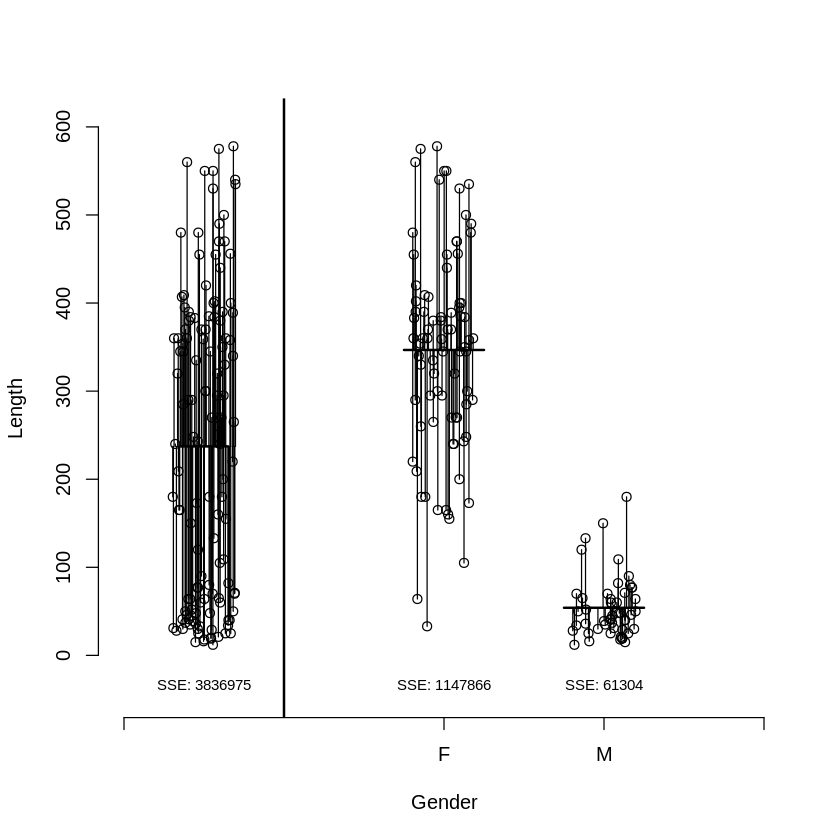

In [ ]:
RSS(Length~Gender,mydata=HairLength, PlotMeans=TRUE, PlotResids=TRUE)



---



---
End of Document
